# 1. train.csv 탐색

In [623]:
import pandas as pd
import os
os.getcwd()
os.chdir('C:\\Users\\susie\\Desktop')

train=pd.read_csv('train.csv')

In [624]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [625]:
train.shape

(891, 12)

In [626]:
train.info() ##총 891개가 있어야 결측값(NaN) 없는 것, 근데 Age, Cabin같은 경우 NaN이 많다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [627]:
train.isnull().sum() ##결측치를 확인하는 다른 방법. Age는 177개, Cabin은 687개구나 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. 데이터 시각화

In [628]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [629]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts() #feature에 따라 생존한 사람(value) 카운트 
    dead=train[train['Survived']==0][feature].value_counts() #feature에 따라 죽은 사람(value) 카운트
    df=pd.DataFrame([survived,dead]) #데이터프레임으로 묶고 
    df.index=['Survived','Dead'] #각 열에 인덱스 달아주고 
    df.plot(kind='bar', stacked=True, figsize=(10,5)) #차트그리기

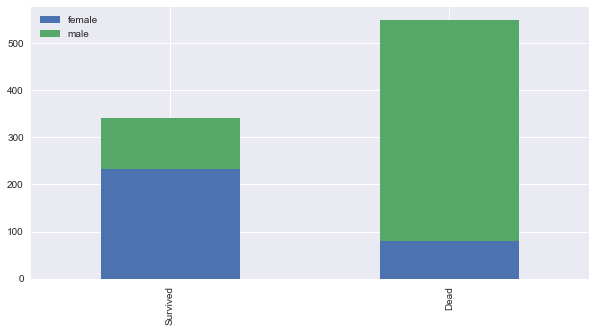

In [630]:
bar_chart('Sex')

산 사람들 중에는 여자가 더 많고 죽은 사람 중에는 남자가 더 많다. 

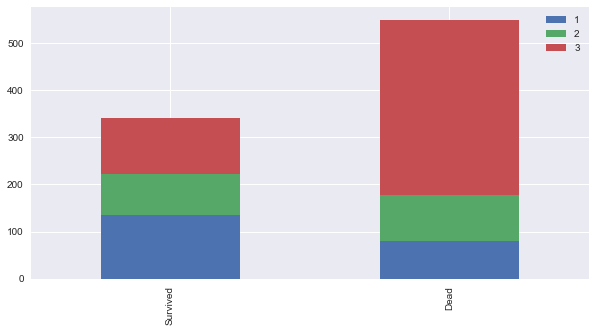

In [631]:
bar_chart('Pclass') #Pclass는 티켓클래스입니다

산 사람들은 티켓클래스가 고르게 있는 반면, 죽은 사람들에는 Pclass=3의 비율이 높습니다.

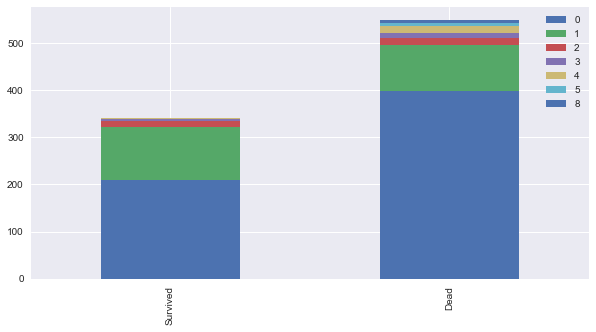

In [632]:
bar_chart('SibSp') #SibSp는 가족 수입니다. 

그래프에 파란부분이 8을 뜻하는게 아니라 0을 뜻하는 것입니다.

같이 탄 가족들 없이 혼자 탄 사람들의 비율이 높음을 시사합니다. 

# 3. 데이터 전처리

In [633]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. text된 데이터들을 숫자로 바꿔주자
2. NaN(NULL)값을 채워줄 방법이 필요하다.  
평균값으로 대체하거나 null값을 가지고 있는 row를 아예 삭제하는 방법 등이 있다. 

# 3-1. Name 처리

이름 자체는 큰 영향이 없다. 하지만 Mr, Mrs, Miss 등 성별, 결혼 유무를 알 수 있는 타이틀은 중요한 정보가 될 수 있다. 따라서 해당 타이틀을 추출한 후 Title 이라는 칼럼에 추가하고, 원래 있던 Name 변수는 삭제한다

In [634]:
train2=[train]  ##train은 dataframe, train2는 list에요 

In [635]:
train2  ##train2는 train을 형식만 바꿔준거에요 

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

Name을 보면 Mrs. Mss. 과 같이 타이틀 바로 뒤에 점이 붙어요.
그걸 이용해서 점 앞까지만 추출하는 것이 아래 코드입니다.
정규표현식을 사용했는데 이는 크롤링할 때 다시 배우니까 여기서는 넘어가도 됩니다

In [636]:
for dataset in train2:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

title의 값별로 갯수를 세니까 Mr가 517개로 가장 많군요! 

In [637]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Don           1
Countess      1
Sir           1
Mme           1
Capt          1
Ms            1
Lady          1
Name: Title, dtype: int64

title을 문자 그대로 쓰기에 분석하기 불편하잖아요. 그래서 숫자로 바꿔줄거에요. 

In [638]:
title_mapping={"Mr":0, "Miss":1,"Mrs":2, "Master":3, "Dr":3, 
               "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3, 
               "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, 
               "Mme":3, "Capt":3, "Sir":3}

In [639]:
for dataset in train2:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [640]:
train.head(5)  ##문자였던 title이 모두 숫자로 변했음을 알 수 있어요!!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Name은 이제 필요없으니까 칼럼 삭제할게요

In [641]:
train.drop('Name', axis=1, inplace=True)

In [642]:
train.head(5)  ##Name이 사라졌음을 알 수 있습니다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# 3-2. 성별 처리

In [643]:
sex_mapping={"male":0, "female":1}
for dataset in train2:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [644]:
train.head(5)  ##성별이 0 또는 1로 바뀌었음을 알 수 있다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


# 3-3. Age 처리

위에서 Age에 Nan 값이 177개 있음을 확인했어요. 177행을 모두 삭제해도 되지만 저는 평균값으로 채울게요. 채울 때 위에서 만든 title을 이용할건데요, title이 같은 숫자인 것 들끼리 그룹을 만들어서, 해당 그룹의 평균값을 Nan 값에 넣어줄거에요

In [645]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

## train을 title 별로 그룹지어서 해당 그룹의 age 칼럼의 median 값으로 대체할게요
## 0=Mr, 1=Mrs, 2=Miss, 3=Others 입니다. 

In [646]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [647]:
train.isnull().sum() ##오 null값을 다시 봤더니 age에 177개가 모두 사라졌어요!!

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

# 3-4. Embarked 처리

embarked는 탑승한 선착장에 관한 정보입니다. Nan값이 2개라고 했어요. 이거는 가장 높은 빈도를 나타내는 S로 채울게요!!

In [648]:
for dataset in train2:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

범주가 S,C,Q로 세 개인데요, 이것도 분석하기 편하게 숫자로 바꿀게요!

In [649]:
embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train2:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [650]:
train.head(5)  ##오 Embarked가 숫자로 바뀌었다 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


# 3-5. Fare 처리

fare의 범위가 아주 넓어요 그래서 구간을 나눠서 범주형 변수처럼 만들게요!

In [651]:
for dataset in train2:
    dataset.loc[ dataset['Fare']<=17, 'Fare']=0,
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare']<=30),'Fare']=1, 
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare'] >100, 'Fare']=3

In [652]:
train.head(5)  ## Fare도 숫자로 바뀌었다!!

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


# 3-6. Cabin 처리

바로 아래에 Cabin의 종류를 봐도 알겠지만 굉장히 여러 종류여서 어떻게 처리해야 할지 애매해요. 심지어 결측치도 많고.. 전처리 중에서 Cabin이 제일 어려워 보입니다

In [653]:
train.Cabin.value_counts().head(10)   ##너무 많아서 10개만 봤어요

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
F33            3
C22 C26        3
D              3
B18            2
C52            2
Name: Cabin, dtype: int64

Cabin이 '알파벳+숫자'로 구성되어있네요? 앞에 알파벳만 따와볼게요

In [654]:
for dataset in train2:
    dataset['Cabin'] =dataset['Cabin'].str[:1]

In [655]:
train.Cabin.value_counts()  ##오 앞자리만 해서 보니까 뭔가 추합된 것 같아요

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

Cabin의 알파벳도 숫자로 바꿔줄게요

In [656]:
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train2:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

Pclass의 median으로 Cabin 결측치 대체 

In [657]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# 3-7. FamilySize 처리

SibSp는 형제자매의 수이고, Parch는 부모자식이에요. 둘을 합치면 FamilySize가 나오기 때문에 두 변수를 하나로 합칠게요!! 그리고 SibSp와 Parch는 제거합니다

In [658]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1  ## sib: 형제자매, parch: 부모자식

In [659]:
train["FamilySize"].max()   ##family의 수의 max가 11명이군

11

In [660]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,38.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,35.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,35.0,0,0,373450,0.0,2.0,0,0,1


In [661]:
feature_drop=['SibSp','Parch']
train=train.drop(feature_drop, axis=1)

In [662]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,38.0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,26.0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,35.0,113803,2.0,0.8,0,2,2
4,5,0,3,0,35.0,373450,0.0,2.0,0,0,1


# 3-8. PassengerId, Ticket 처리 

PassengerId와 Ticket 열을 삭제할게요!

In [663]:
train=train.drop(['PassengerId'], axis=1)

In [664]:
train=train.drop(['Ticket'], axis=1)

In [665]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,0.0,2.0,0,0,2
1,1,1,1,38.0,2.0,0.8,1,2,2
2,1,3,1,26.0,0.0,2.0,0,1,1
3,1,1,1,35.0,2.0,0.8,0,2,2
4,0,3,0,35.0,0.0,2.0,0,0,1


In [666]:
train_data=train.drop('Survived', axis=1)
target=train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

# 4. NB모델 적합

In [667]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [668]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


# 4-1. K-fold Cross Validation 교차검증 진행

In [669]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

# 4-2. Naive Bayes 훈련, 예측, 정확도 구하기

In [670]:
clf=GaussianNB()
clf

GaussianNB(priors=None)

10번의 정확도를 구해서 평균내기!!

In [671]:
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[ 0.85555556  0.73033708  0.75280899  0.75280899  0.70786517  0.80898876
  0.76404494  0.80898876  0.86516854  0.83146067]


In [672]:
print(round(np.mean(score)*100, 2))

78.78
